In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# 2차원 리스트로 만들기
fish_data = np.column_stack((fish_length, fish_weight))

In [4]:
# 타깃데이터 만들기

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 사이킷런으로 test, train set 분류하기

- 사이킷런 : 알고리즘 모델, 다양한 유틸리티 도구 제공
- train_test_split은 자체적으로 랜덤 시드를 지정할 수 있는 random_state 매개변수가 있음

In [5]:
# 순서유의
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [6]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [7]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [8]:
# 타겟값이 잘 섞였는지 확인
# 두 생선의 비율이 3.3:1로 샘플링 편향이 나타나는 편

print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
# 샘플링 편향을 없애기 위해 다시 분리
# stratify를 이용하여 일정 비율 유지

train_input, test_input, train_target, test_target = train_test_split(
                                                      fish_data, fish_target, stratify=fish_target, random_state=42)

In [12]:
# train / test의 비율 2.5:1
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


# 모델 훈련 및 평가

In [13]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [19]:
# 도미와 관련된 데이터이지만 빙어로 예측

kn.predict([[25,150]])

array([0.])

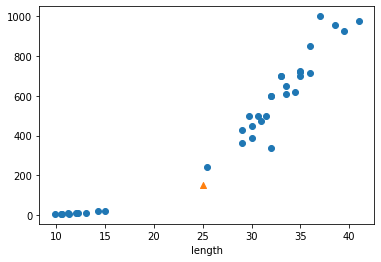

In [17]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel=('width')
plt.show()

In [23]:
# 빙어로 예측한 이유 : kNeighborsClassifier 클래스는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

distances, indexes = kn.kneighbors([[25,150]])

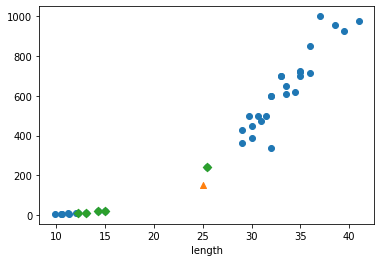

In [27]:
# indexes를 이용하여 이웃 샘플 따로 그려보기
# [[25,150]]이 샘플링한 값 중 4개가 빙어 -> 빙어로 예측

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel=('width')
plt.show()

In [30]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

x축의 범위가 좁고 (10~40), y축의 범위가 넓어서 (0~1000) 거리가 비슷함에도 불구하고 멀어보이는 문제 발생
-> 눈으로 명확하게 확인하기 위해 x축도 동일하게 0~1000으로 맞추어주어야 함

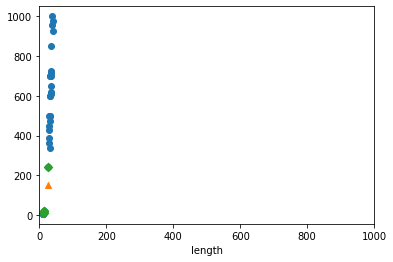

In [31]:
# x축이 거의 일직선이기에 생선의 무게만이 고려 대상이 됨

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel=('width')
plt.show()

- 스케일 : 두 특성의 값이 놓인 범위
- 전처리 : 알고리즘들은 샘플 간의 거리에 영향을 많이 받음 -> 제대로 사용하기 위해 특성값을 일정한 기준으로 맞춰주어야 함.<br><br>
- 표준점수 : 
  - 가장 널리 이용하는 전처리 방식
  - 각 특성이 평균에서 표준편차의 몇 배만큼 떨어져있는지를 나타냄

In [32]:
# 표준점수를 구하기 위해 평균을 빼고 표준편차로 나누어줌
# axis=0 -> 각 열마다 통계 값 계산

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [33]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [34]:
# 표준점수 반환 -> 브로드캐스팅 됨
train_scaled = (train_input - mean)/std

In [35]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

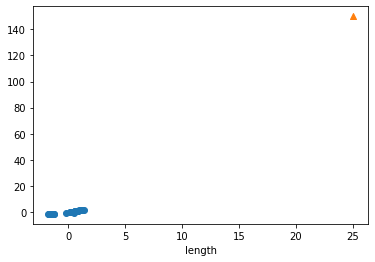

In [36]:
# 전처리된 데이터로 다시 산점도 그리기
# 샘플 [25,150]이 그리프 상에서 동떨어져있음 -> 평균점수를 그려주어야 올바른 산점고를 확인할 수 있음

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel=('width')
plt.show()

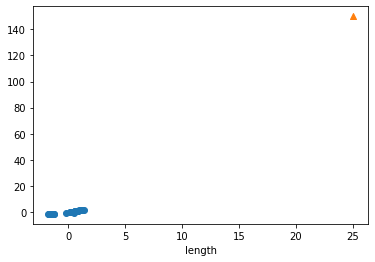

In [37]:
# 앞서 그렸던 산점도와 비슷하나 x,y축의 범위가 -1.5 ~ 1.5로 변환됨
# 두 특성이 비슷한 범위를 차지한다는 뜻

new = ([25,150] -  mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel=('width')
plt.show()

In [38]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [39]:
# 테스트 데이터도 똑같이 변환해주기

test_scaled = (test_input - mean)/std

In [41]:
kn.score(test_scaled, test_target)

1.0

In [42]:
# 도미로 예측
kn.predict([new])

array([1.])

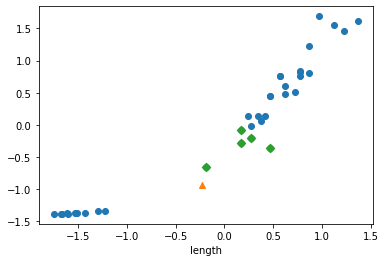

In [45]:
# 표준점수로 바꾼 데이터 산점도 마지막으로 그려보기
# [25,150]에 가장 가까운 샘플은 도미

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel=('width')
plt.show()